## Obsession and COmpulsion BERT Model. 

# The Models trained in dataset that labelled by ontology and evaluated using manual labelling.  

In [1]:
pip install contractions

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/areejnasser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/areejnasser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/areejnasser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
from tensorflow.keras.preprocessing.text import Tokenizer

2024-01-15 18:14:03.633283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Cleaning data

In [4]:
import re
#define the process of text cleaning
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)

#Clean Text
def clean_text(data):
    # convert catacter to lowercase
    data['clean_text']=data['yy'].str.lower()
    #remove URLS
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"http\S+", "", elem))
    #remove ponctuation
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"[^\w\s]", "", elem))
    #remove
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'/n',"",elem))
    #remove degits
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\d+',"",elem))
    #remove emojis
    data['clean_text'] = data['clean_text'].apply(lambda elem:deEmojify(elem))
    #remove multiple spaces
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+'," ",elem))
    #remove single caracter
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+[a-zA-Z]\s+'," ",elem))
    return data

def process_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Handle contractions using the contractions library
    expanded_text = contractions.fix(text)

    # Lowercasing
    expanded_text = expanded_text.lower()

    # Tokenization
    tokens = word_tokenize(expanded_text)

    # Removing Punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Removing Stop Words
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [5]:
df = pd.read_csv('/Users/areejnasser/Desktop/BERT1/Dataset/combined_ontology_enriched.csv')
df


,post,prefLabel,obsession,compulsion,mergedAnnotations
0,Hi -\nSo I haven't been on here since December...,"['depression', 'weight gain', 'Medication', 'a...",1.0,0.0,NaN
1,"Hi all, hope you're all having a wonderful ban...","['compulsion', 'anger', 'symptom', 'compassion...",1.0,1.0,NaN
2,"Hi, \nFirst, I hope everyone managed to have s...","['hope', 'happiness', 'guilt', 'fear', 'obsess...",1.0,0.0,NaN
3,Hello everyone. I could really use your help r...,"['Treatment', 'hope', 'Thought', 'obsession', ...",1.0,0.0,NaN
4,"Though it comes in many flavors, one of the mo...","['quality', 'Intrusive thoughts', 'fall', 'beh...",1.0,1.0,NaN
...,...,...,...,...,...
11261,Hi.\nMy name is Anar. I'm from Republic of Aze...,"['wasting', 'washing hands', 'checking', 'shav...",NaN,1.0,"['garage', 'washing hands', 'shaving', 'wastin..."
11262,Its just over a year since my latest OCD theme...,"['Thought', 'fear', 'OCD']",1.0,NaN,"['fear', 'Thought', 'spike', 'theme', 'OCD']"
11263,When I go for cbt with core mental health team...,"['writing', 'OCD', 'Rituals']",NaN,1.0,"['writing', 'Rituals', 'OCD']"
11264,Am moaning again but could do with some inspir...,"['OCD', 'Rituals', 'arthritis']",NaN,1.0,"['arthritis', 'Rituals', 'OCD']"


In [7]:
df1 = pd.read_csv('/Users/areejnasser/Desktop/BERT1/Dataset/merged_annotations_500 2.csv') 

In [6]:
df['post'] = df['post'].fillna('')
df['post'] = df['post'].apply(process_text)
df.head()


,post,prefLabel,obsession,compulsion,mergedAnnotations
0,hi since december since recovering prozac sinc...,"['depression', 'weight gain', 'Medication', 'a...",1.0,0.0,NaN
1,hi hope wonderful bank holiday whatever howeve...,"['compulsion', 'anger', 'symptom', 'compassion...",1.0,1.0,NaN
2,hi first hope everyone managed joy happiness c...,"['hope', 'happiness', 'guilt', 'fear', 'obsess...",1.0,0.0,NaN
3,hello everyone could really use help right ide...,"['Treatment', 'hope', 'Thought', 'obsession', ...",1.0,0.0,NaN
4,though come many flavor one common ocd theme s...,"['quality', 'Intrusive thoughts', 'fall', 'beh...",1.0,1.0,NaN


In [8]:
# Impute NaN values in 'obsession' column with 0
df['obsession'].fillna(0, inplace=True)
# Impute NaN values in 'obsession' column with 0
df['compulsion'].fillna(0, inplace=True)


In [9]:

# Count number of posts with label 1 and 0 for each class
obsession_label_counts = df['obsession'].value_counts()
compulsion_label_counts = df['compulsion'].value_counts()

obsession_label_counts, compulsion_label_counts



(obsession
 1.0    5917
 0.0    5349
 Name: count, dtype: int64,
 compulsion
 0.0    7849
 1.0    3417
 Name: count, dtype: int64)

In [10]:
# Counting the number of posts that have '1' in both 'obsession_first_checker' and 'obsession_second_checker' columns
count_agreed_1 = df1[(df1['obsession_first_checker'] == 1) & (df1['obsession_second_checker'] == 1)].shape[0]
count_agreed_2 = df1[(df1['obsession_first_checker'] == 0) & (df1['obsession_second_checker'] == 0)].shape[0]
# Count the number of posts with label 1 in the 'Obsession exp' column
obsession_exp_count = df1[df1['Obsession exp'] == 1].shape[0]


count_agreed_1, count_agreed_2, obsession_exp_count


(162, 323, 39)

In [11]:
# Apply the condition and create the 'agreed_obsession_label' column
df1['agreed_obsession_label'] = (
    ((df1['obsession_first_checker'] == 1) & (df1['obsession_second_checker'] == 1)) | 
    (df1['Obsession exp'] == 1)
).astype(int)

# Apply the condition and create the 'agreed_compulsion_label' column
df1['agreed_compulsion_label'] = (
    ((df1['compulsion_first_checker'] == 1) & (df1['compulsion_second_checker'] == 1)) | 
    (df1['Compulsion exp'] == 1)
).astype(int)

# Now, calculate the count for each label
label_1_obsession = df1[df1['agreed_obsession_label'] == 1].shape[0]
label_0_obsession = df1[df1['agreed_obsession_label'] == 0].shape[0]

label_1_compulsion = df1[df1['agreed_compulsion_label'] == 1].shape[0]
label_0_compulsion = df1[df1['agreed_compulsion_label'] == 0].shape[0]

print("Obsession Label 1 Count:", label_1_obsession)
print("Obsession Label 0 Count:", label_0_obsession)
print("Compulsion Label 1 Count:", label_1_compulsion)
print("Compulsion Label 0 Count:", label_0_compulsion)


Obsession Label 1 Count: 173
Obsession Label 0 Count: 326
Compulsion Label 1 Count: 48
Compulsion Label 0 Count: 451


In [32]:
# Select the first 500 rows
df_subset = df1.head(500).copy()

# Clean the 'post' column
df_subset['post'] = df_subset['post'].fillna('')
df_subset['post'] = df_subset['post'].apply(process_text)

# Filter rows where 'obsession_first_checker' has labels 0 or 1
filtered_df = df_subset[df_subset['agreed_obsession_label'].isin([0, 1])].copy()

# Filter rows where 'obsession_first_checker' has labels 0 or 1
filtered_df = df_subset[df_subset['obsession_first_checker'].isin([0, 1])].copy()
# Filter rows where 'obsession_first_checker' has labels 0 or 1
filtered_df = df_subset[df_subset['agreed_compulsion_label'].isin([0, 1])].copy()

# Save the cleaned dataset to a new CSV file
filtered_df.to_csv('manual_500_enrichOntology_aggrement.csv', index=False)

# Display the first few rows of the updated DataFrame
print(filtered_df.head())


                                                post  \
0  grew obsessive thought aptly intrusive thought...   
1  thinking much covid part job well right concer...   
2  fed send day checking excessive checking every...   
3  noticed washing hand lately thing triggering n...   
4  sound stupid moment want download window live ...   

                                           prefLabel  obsession_first_checker  \
0  ['site', 'compulsion', 'obsession', 'rash', 'p...                        1   
1  ['singing', 'washing hands', 'anxiety', 'anxie...                        1   
2                     ['OCD', 'checking', 'Thought']                        1   
3     ['washing hands', 'hope', 'depression', 'OCD']                        1   
4                                        ['Thought']                        1   

   obsession_second_checker  obsession_third_checker  \
0                         1                        1   
1                         1                        1   
2       

In [13]:
# Count the number of posts with label 1 and label 0 in 'agreed_obsession_label'
label_1_count = filtered_df[filtered_df['agreed_obsession_label'] == 1].shape[0]
label_0_count = filtered_df[filtered_df['agreed_obsession_label'] == 0].shape[0]

# Count the number of posts with label 1 and label 0 in 'agreed_obsession_label'
label_1_count_com = filtered_df[filtered_df['agreed_compulsion_label'] == 1].shape[0]
label_0_count_com = filtered_df[filtered_df['agreed_compulsion_label'] == 0].shape[0]

label_1_count, label_0_count, label_1_count_com, label_0_count_com

(173, 326, 48, 451)

In [39]:
len(filtered_df)

499

## Training and Testing

In [41]:
test_split = 0.2

# Initial train and test split.
train_df, test_df = train_test_split(df, test_size=test_split, stratify=df[['obsession']].values, )
test_df,val_df = train_test_split(test_df,test_size=0.5,stratify=test_df[['obsession']].values)
# Splitting the test set further into validation and new test sets.
# val_df = test_df.sample(frac=0.5)
# test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 9012
Number of rows in validation set: 1127
Number of rows in test set: 1127


In [42]:
train_x,train_y = train_df['post'], train_df[['obsession']]
test_x,test_y = test_df['post'], test_df[['obsession']]
val_x,val_y = val_df['post'], val_df[['obsession']]

In [13]:
# Count the number of labels as 0 and 1 for each group
print("Training set:")
print(train_y['obsession'].value_counts())

print("\nValidation set:")
print(val_y['obsession'].value_counts())

print("\nTest set:")
print(test_y['obsession'].value_counts())


Training set:
1.0    4733
0.0    4279
Name: obsession, dtype: int64

Validation set:
1.0    592
0.0    535
Name: obsession, dtype: int64

Test set:
1.0    592
0.0    535
Name: obsession, dtype: int64


## Cross-Validation BERT Model for (Ontology with Enrichment) Labelled Dataset

In [64]:
#okenize and Encode the Entire Dataset: You need to tokenize and encode your entire dataset (not split into train/test/val) since cross-validation will involve creating multiple such splits internally.
full_encodings = tokenizer(df['post'].tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')
full_labels = tf.convert_to_tensor(df[['obsession']], dtype=tf.int32)


In [65]:
#Convert Encodings to Numpy Arrays: This is necessary for compatibility with cross-validation functions.
full_encodings = {key: np.array(value) for key, value in full_encodings.items()}


In [19]:
import transformers
import tensorflow as tf

print("Transformers version:", transformers.__version__)
print("TensorFlow version:", tf.__version__)


Transformers version: 4.31.0
TensorFlow version: 2.13.1


## Evaluation Using Manual label Dataset / Aggrement between two annotator + data labelled by the Ontology (enrichment)


In [14]:
from sklearn.model_selection import train_test_split, KFold
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data preparation
posts = df['post'].tolist()
labels = df['obsession'].tolist()  # Replace 'obsession' with 'compulsion' if needed

# Tokenize the data
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
encodings = tokenizer(posts, truncation=True, padding=True, max_length=128, return_tensors='np')

# Convert labels to numpy array
labels_np = np.array(labels)

# Split data into training and test sets
train_encodings, test_encodings, train_labels, test_labels = train_test_split(encodings['input_ids'], labels_np, test_size=0.2, random_state=42)

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores
accuracy_scores = []
loss_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(train_encodings)):
    # Split the data for this fold
    train_fold_encodings = {'input_ids': train_encodings[train_index]}
    val_fold_encodings = {'input_ids': train_encodings[val_index]}
    train_fold_labels = train_labels[train_index]
    val_fold_labels = train_labels[val_index]

    # Load BERT model
    model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    # Train the model
    history = model.fit(train_fold_encodings, train_fold_labels, validation_data=(val_fold_encodings, val_fold_labels), epochs=4, batch_size=32)

    # Evaluate the model on the validation set
    val_loss, val_accuracy, val_precision, val_recall = model.evaluate(val_fold_encodings, val_fold_labels)
    accuracy_scores.append(val_accuracy)
    loss_scores.append(val_loss)
    precision_scores.append(val_precision)
    recall_scores.append(val_recall)
    f1_scores.append(2 * (val_precision * val_recall) / (val_precision + val_recall))

# Print average scores across all folds
print("Cross-Validation Results:")
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Loss:", np.mean(loss_scores))
print("Average Precision:", np.mean(precision_scores))
print("Average Recall:", np.mean(recall_scores))
print("Average F1-Score:", np.mean(f1_scores))

# Prepare test set
test_encodings = {'input_ids': test_encodings}

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_encodings, test_labels)
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

# Print test set scores
print("Test Set Results:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1_score}")

# Save the fine-tuned model
model.save_pretrained('/Users/areejnasser/Desktop/obsession_model2')


/usr/local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
226/226 [==============================] - 2883s 13s/step - loss: 0.4356 - accuracy: 0.7696 - precision: 0.8211 - recall: 0.7134 - val_loss: 0.1985 - val_accuracy: 0.9096 - val_precision: 0.9607 - val_recall: 0.8656
Epoch 2/4
226/226 [==============================] - 2753s 12s/step - loss: 0.1578 - accuracy: 0.9369 - precision: 0.9594 - recall: 0.9178 - val_loss: 0.1296 - val_accuracy: 0.9517 - val_precision: 0.9495 - val_recall: 0.9604
Epoch 3/4
226/226 [==============================] - 2735s 12s/step - loss: 0.1145 - accuracy: 0.9548 - precision: 0.9694 - recall: 0.9431 - val_loss: 0.1187 - val_accuracy: 0.9540 - val_precision: 0.9592 - val_recall: 0.9542
Epoch 4/4
57/57 [==============================] - 233s 4s/step - loss: 0.1329 - accuracy: 0.9540 - precision: 0.9601 - recall: 0.9531


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
226/226 [==============================] - 4177s 18s/step - loss: 0.4392 - accuracy: 0.7739 - precision_1: 0.8141 - recall_1: 0.7409 - val_loss: 0.1997 - val_accuracy: 0.9201 - val_precision_1: 0.9295 - val_recall_1: 0.9112
Epoch 2/4
226/226 [==============================] - 3341s 15s/step - loss: 0.1544 - accuracy: 0.9354 - precision_1: 0.9578 - recall_1: 0.9180 - val_loss: 0.1466 - val_accuracy: 0.9479 - val_precision_1: 0.9616 - val_recall_1: 0.9342
Epoch 3/4
226/226 [==============================] - 2660s 12s/step - loss: 0.1153 - accuracy: 0.9535 - precision_1: 0.9672 - recall_1: 0.9440 - val_loss: 0.1236 - val_accuracy: 0.9490 - val_precision_1: 0.9566 - val_recall_1: 0.9419
Epoch 4/4
57/57 [==============================] - 195s 3s/step - loss: 0.1500 - accuracy: 0.9529 - precision_1: 0.9579 - recall_1: 0.9485


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
226/226 [==============================] - 2559s 11s/step - loss: 0.4011 - accuracy: 0.8087 - precision_2: 0.8458 - recall_2: 0.7755 - val_loss: 0.2003 - val_accuracy: 0.9373 - val_precision_2: 0.9345 - val_recall_2: 0.9473
Epoch 2/4
226/226 [==============================] - 2494s 11s/step - loss: 0.1501 - accuracy: 0.9412 - precision_2: 0.9627 - recall_2: 0.9233 - val_loss: 0.1425 - val_accuracy: 0.9528 - val_precision_2: 0.9491 - val_recall_2: 0.9621
Epoch 3/4
226/226 [==============================] - 2490s 11s/step - loss: 0.1113 - accuracy: 0.9548 - precision_2: 0.9726 - recall_2: 0.9400 - val_loss: 0.1376 - val_accuracy: 0.9473 - val_precision_2: 0.9543 - val_recall_2: 0.9452
Epoch 4/4
57/57 [==============================] - 189s 3s/step - loss: 0.1395 - accuracy: 0.9517 - precision_2: 0.9398 - recall_2: 0.9705


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
226/226 [==============================] - 2504s 11s/step - loss: 0.4888 - accuracy: 0.7510 - precision_3: 0.7860 - recall_3: 0.7148 - val_loss: 0.2448 - val_accuracy: 0.8996 - val_precision_3: 0.9354 - val_recall_3: 0.8751
Epoch 2/4
226/226 [==============================] - 2487s 11s/step - loss: 0.1811 - accuracy: 0.9244 - precision_3: 0.9603 - recall_3: 0.8912 - val_loss: 0.1235 - val_accuracy: 0.9501 - val_precision_3: 0.9644 - val_recall_3: 0.9427
Epoch 3/4
226/226 [==============================] - 2461s 11s/step - loss: 0.1243 - accuracy: 0.9499 - precision_3: 0.9640 - recall_3: 0.9385 - val_loss: 0.1242 - val_accuracy: 0.9489 - val_precision_3: 0.9663 - val_recall_3: 0.9386
Epoch 4/4
57/57 [==============================] - 187s 3s/step - loss: 0.1229 - accuracy: 0.9501 - precision_3: 0.9654 - recall_3: 0.9417


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
226/226 [==============================] - 2513s 11s/step - loss: 0.4343 - accuracy: 0.7879 - precision_4: 0.8184 - recall_4: 0.7678 - val_loss: 0.2136 - val_accuracy: 0.9234 - val_precision_4: 0.9124 - val_recall_4: 0.9402
Epoch 2/4
226/226 [==============================] - 2472s 11s/step - loss: 0.1563 - accuracy: 0.9411 - precision_4: 0.9614 - recall_4: 0.9252 - val_loss: 0.1433 - val_accuracy: 0.9434 - val_precision_4: 0.9370 - val_recall_4: 0.9533
Epoch 3/4
226/226 [==============================] - 2597s 11s/step - loss: 0.1190 - accuracy: 0.9577 - precision_4: 0.9679 - recall_4: 0.9513 - val_loss: 0.1384 - val_accuracy: 0.9478 - val_precision_4: 0.9311 - val_recall_4: 0.9696
Epoch 4/4
57/57 [==============================] - 202s 4s/step - loss: 0.1626 - accuracy: 0.9467 - precision_4: 0.9310 - recall_4: 0.9674
Cross-Validation Results:
Average Accuracy: 0.9510647177696228
Average Loss: 0.14159321039915085
Average Precision: 0.9508349418640136
Average Recall: 0.956226

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


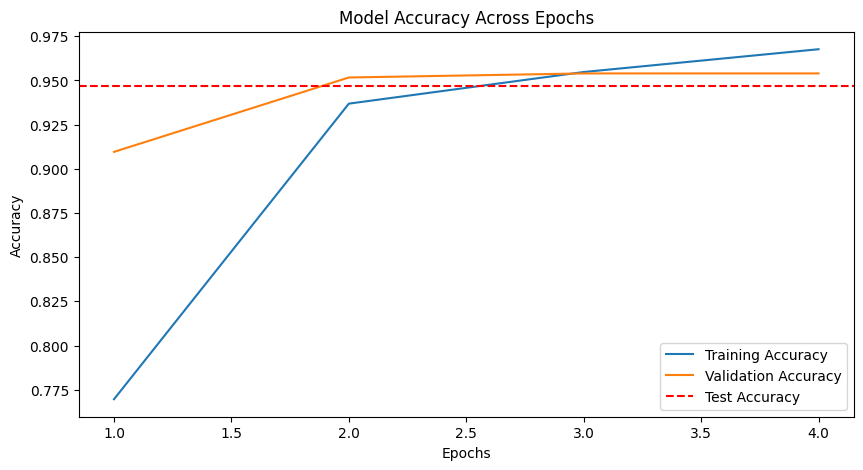

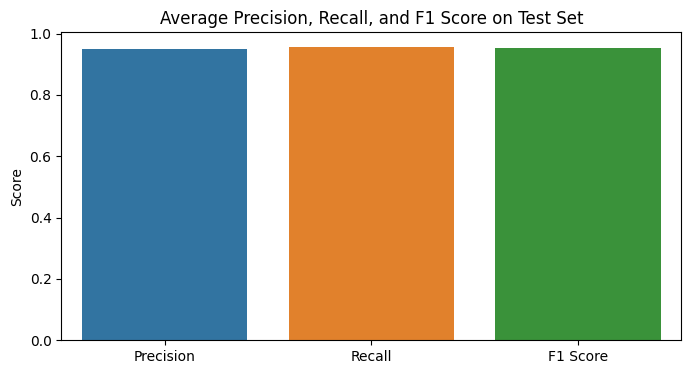

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data - updated with your actual results
epochs = [1, 2, 3, 4]
training_accuracy = [0.7696, 0.9369, 0.9548, 0.9677]  # Update with your training accuracy values
validation_accuracy = [0.9096, 0.9517, 0.9540, 0.9540]  # Update with your validation accuracy values
test_accuracy = 0.9468  # Update with your test accuracy

# Average precision, recall, and F1 score from cross-validation results
average_precision = 0.9508
average_recall = 0.9562
average_f1_score = 0.9534

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
sns.lineplot(epochs, training_accuracy, label='Training Accuracy')
sns.lineplot(epochs, validation_accuracy, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across Epochs')
plt.legend()
plt.show()

# Plotting average precision, recall, and F1 score
plt.figure(figsize=(8, 4))
sns.barplot(x=['Precision', 'Recall', 'F1 Score'], y=[average_precision, average_recall, average_f1_score])
plt.title('Average Precision, Recall, and F1 Score on Test Set')
plt.ylabel('Score')
plt.show()


In [37]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def compute_metrics(true_labels, predicted_probs, threshold):
    predicted_labels = np.where(predicted_probs > threshold, 1, 0)
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    return accuracy, precision, recall, f1

# Load the dataset

posts_subset = filtered_df['post'].tolist()
labels_subset = filtered_df['obsession_first_checker'].tolist()

# Tokenize the new dataset
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
encodings_subset = tokenizer(posts_subset, truncation=True, padding=True, max_length=128, return_tensors='tf')

# Load the model
model_path = '/Users/areejnasser/Desktop/obsession_model2'
model = TFAutoModelForSequenceClassification.from_pretrained(model_path)

# Predict
predictions = model(encodings_subset['input_ids'], attention_mask=encodings_subset['attention_mask'])
logits = predictions.logits
probabilities = tf.keras.activations.sigmoid(logits).numpy()


# Evaluate at different thresholds
thresholds = np.linspace(0.1, 0.9, 9)
for thresh in thresholds:
    accuracy, precision, recall, f1 = compute_metrics(labels_subset, probabilities.flatten(), thresh)
    print(f"Threshold: {thresh:.2f} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Some layers from the model checkpoint at /Users/areejnasser/Desktop/obsession_model2 were not used when initializing TFBertForSequenceClassification: ['dropout_189']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /Users/areejnasser/Desktop/obsession_model2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Threshold: 0.10 - Accuracy: 0.3407, Precision: 0.3347, Recall: 0.9133, F1 Score: 0.4899
Threshold: 0.20 - Accuracy: 0.3527, Precision: 0.3303, Recall: 0.8439, F1 Score: 0.4748
Threshold: 0.30 - Accuracy: 0.3747, Precision: 0.3333, Recall: 0.8035, F1 Score: 0.4712
Threshold: 0.40 - Accuracy: 0.3928, Precision: 0.3333, Recall: 0.7514, F1 Score: 0.4618
Threshold: 0.50 - Accuracy: 0.4208, Precision: 0.3304, Recall: 0.6532, F1 Score: 0.4388
Threshold: 0.60 - Accuracy: 0.4529, Precision: 0.3355, Recall: 0.5896, F1 Score: 0.4277
Threshold: 0.70 - Accuracy: 0.4990, Precision: 0.3547, Recall: 0.5434, F1 Score: 0.4292
Threshold: 0.80 - Accuracy: 0.5531, Precision: 0.3798, Recall: 0.4566, F1 Score: 0.4147
Threshold: 0.90 - Accuracy: 0.6353, Precision: 0.4628, Recall: 0.3237, F1 Score: 0.3810


In [47]:
# Tokenize the data
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
encodings = tokenizer(df['post'].tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')

# Convert labels to numpy array
labels_np = np.array(df['obsession'].tolist())

# Split data into training and test sets
train_encodings, test_encodings, train_labels, test_labels = train_test_split(encodings['input_ids'].numpy(), labels_np, test_size=0.2, random_state=42)

# Load BERT model
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
history = model.fit(train_encodings, train_labels, validation_data=(test_encodings, test_labels), epochs=4, batch_size=32)

# Predict on a subset of data (posts_subset)
posts_subset = filtered_df['post'].tolist()
labels_subset = filtered_df['obsession_first_checker'].tolist()

# Tokenize the posts_subset
encodings_subset = tokenizer(posts_subset, truncation=True, padding=True, max_length=128, return_tensors='tf')

# Predict the labels for the posts_subset
predictions = model(encodings_subset['input_ids'].numpy(), attention_mask=encodings_subset['attention_mask'].numpy())
logits = predictions.logits

# Convert logits to probabilities
probabilities = tf.keras.activations.sigmoid(logits).numpy()
predicted_labels = np.where(probabilities > 0.5, 1, 0).flatten()

# Evaluate the model on the posts_subset
accuracy = accuracy_score(labels_subset, predicted_labels)
precision = precision_score(labels_subset, predicted_labels)
recall = recall_score(labels_subset, predicted_labels)
f1 = f1_score(labels_subset, predicted_labels)
roc_auc = roc_auc_score(labels_subset, probabilities)

print("Performance on posts_subset:")
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}, ROC AUC: {roc_auc}")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
282/282 [==============================] - 3368s 12s/step - loss: 0.4211 - accuracy: 0.7805 - precision_5: 0.8359 - recall_5: 0.7226 - val_loss: 0.2064 - val_accuracy: 0.9201 - val_precision_5: 0.9419 - val_recall_5: 0.9058
Epoch 2/4
282/282 [==============================] - 3317s 12s/step - loss: 0.1445 - accuracy: 0.9422 - precision_5: 0.9650 - recall_5: 0.9231 - val_loss: 0.1676 - val_accuracy: 0.9414 - val_precision_5: 0.9285 - val_recall_5: 0.9641
Epoch 3/4
282/282 [==============================] - 3230s 11s/step - loss: 0.1162 - accuracy: 0.9541 - precision_5: 0.9697 - recall_5: 0.9417 - val_loss: 0.1733 - val_accuracy: 0.9410 - val_precision_5: 0.9264 - val_recall_5: 0.9658
Epoch 4/4
282/282 [==============================] - 3230s 11s/step - loss: 0.0943 - accuracy: 0.9655 - precision_5: 0.9771 - recall_5: 0.9565 - val_loss: 0.1680 - val_accuracy: 0.9414 - val_precision_5: 0.9502 - val_recall_5: 0.9391
Performance on posts_subset:
Accuracy: 0.5370741482965932, Preci

# Compulsin (BERT Model For Datset Labelled By Ontology (enriched) and Manual)

In [87]:
from sklearn.model_selection import train_test_split, KFold
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data preparation
posts = combined_df['post'].tolist()
labels = combined_df['compulsion'].tolist()  # Replace 'obsession' with 'compulsion' if needed

# Tokenize the data
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
encodings = tokenizer(posts, truncation=True, padding=True, max_length=128, return_tensors='np')

# Convert labels to numpy array
labels_np = np.array(labels)

# Split data into training and test sets
train_encodings, test_encodings, train_labels, test_labels = train_test_split(encodings['input_ids'], labels_np, test_size=0.2, random_state=42)

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores
accuracy_scores = []
loss_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(train_encodings)):
    # Split the data for this fold
    train_fold_encodings = {'input_ids': train_encodings[train_index]}
    val_fold_encodings = {'input_ids': train_encodings[val_index]}
    train_fold_labels = train_labels[train_index]
    val_fold_labels = train_labels[val_index]

    # Load BERT model
    model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    # Train the model
    history = model.fit(train_fold_encodings, train_fold_labels, validation_data=(val_fold_encodings, val_fold_labels), epochs=4, batch_size=32)

    # Evaluate the model on the validation set
    val_loss, val_accuracy, val_precision, val_recall = model.evaluate(val_fold_encodings, val_fold_labels)
    accuracy_scores.append(val_accuracy)
    loss_scores.append(val_loss)
    precision_scores.append(val_precision)
    recall_scores.append(val_recall)
    f1_scores.append(2 * (val_precision * val_recall) / (val_precision + val_recall))

# Print average scores across all folds
print("Cross-Validation Results:")
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Loss:", np.mean(loss_scores))
print("Average Precision:", np.mean(precision_scores))
print("Average Recall:", np.mean(recall_scores))
print("Average F1-Score:", np.mean(f1_scores))

# Prepare test set
test_encodings = {'input_ids': test_encodings}

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_encodings, test_labels)
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

# Print test set scores
print("Test Set Results:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1_score}")

# Save the fine-tuned model
model.save_pretrained('/Users/areejnasser/Desktop/cross-val 3')


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2754s 12s/step - loss: 0.4071 - accuracy: 0.8000 - precision_12: 0.9556 - recall_12: 0.3389 - val_loss: 0.2109 - val_accuracy: 0.9219 - val_precision_12: 0.9191 - val_recall_12: 0.7865
Epoch 2/4
236/236 [==============================] - 2704s 11s/step - loss: 0.1731 - accuracy: 0.9347 - precision_12: 0.9602 - recall_12: 0.8126 - val_loss: 0.1708 - val_accuracy: 0.9368 - val_precision_12: 0.9652 - val_recall_12: 0.8000
Epoch 3/4
236/236 [==============================] - 2733s 12s/step - loss: 0.1361 - accuracy: 0.9507 - precision_12: 0.9706 - recall_12: 0.8593 - val_loss: 0.1400 - val_accuracy: 0.9480 - val_precision_12: 0.9470 - val_recall_12: 0.8596
Epoch 4/4
59/59 [==============================] - 205s 3s/step - loss: 0.1416 - accuracy: 0.9458 - precision_12: 0.9524 - recall_12: 0.8462


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2771s 12s/step - loss: 0.5102 - accuracy: 0.7403 - precision_13: 0.9091 - recall_13: 0.1269 - val_loss: 0.2316 - val_accuracy: 0.9251 - val_precision_13: 0.9251 - val_recall_13: 0.8030
Epoch 2/4
236/236 [==============================] - 2703s 11s/step - loss: 0.2031 - accuracy: 0.9247 - precision_13: 0.9515 - recall_13: 0.7830 - val_loss: 0.1541 - val_accuracy: 0.9469 - val_precision_13: 0.9660 - val_recall_13: 0.8439
Epoch 3/4
236/236 [==============================] - 2709s 11s/step - loss: 0.1477 - accuracy: 0.9453 - precision_13: 0.9682 - recall_13: 0.8410 - val_loss: 0.1260 - val_accuracy: 0.9554 - val_precision_13: 0.9809 - val_recall_13: 0.8606
Epoch 4/4
59/59 [==============================] - 241s 4s/step - loss: 0.1393 - accuracy: 0.9533 - precision_13: 0.9395 - recall_13: 0.8941


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 3287s 14s/step - loss: 0.4710 - accuracy: 0.7772 - precision_14: 0.9531 - recall_14: 0.2422 - val_loss: 0.2334 - val_accuracy: 0.9118 - val_precision_14: 0.9290 - val_recall_14: 0.7646
Epoch 2/4
236/236 [==============================] - 2848s 12s/step - loss: 0.1864 - accuracy: 0.9321 - precision_14: 0.9543 - recall_14: 0.8041 - val_loss: 0.1542 - val_accuracy: 0.9384 - val_precision_14: 0.9787 - val_recall_14: 0.8124
Epoch 3/4
236/236 [==============================] - 3010s 13s/step - loss: 0.1361 - accuracy: 0.9501 - precision_14: 0.9727 - recall_14: 0.8514 - val_loss: 0.1429 - val_accuracy: 0.9421 - val_precision_14: 0.9524 - val_recall_14: 0.8496
Epoch 4/4
59/59 [==============================] - 209s 4s/step - loss: 0.1479 - accuracy: 0.9426 - precision_14: 0.9673 - recall_14: 0.8372


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2768s 12s/step - loss: 0.4098 - accuracy: 0.7967 - precision_15: 0.9473 - recall_15: 0.3197 - val_loss: 0.2238 - val_accuracy: 0.9139 - val_precision_15: 0.8900 - val_recall_15: 0.8062
Epoch 2/4
236/236 [==============================] - 2638s 11s/step - loss: 0.1818 - accuracy: 0.9320 - precision_15: 0.9483 - recall_15: 0.8108 - val_loss: 0.1750 - val_accuracy: 0.9325 - val_precision_15: 0.9493 - val_recall_15: 0.8134
Epoch 3/4
236/236 [==============================] - 2608s 11s/step - loss: 0.1289 - accuracy: 0.9523 - precision_15: 0.9669 - recall_15: 0.8659 - val_loss: 0.1766 - val_accuracy: 0.9352 - val_precision_15: 0.8826 - val_recall_15: 0.8986
Epoch 4/4
59/59 [==============================] - 199s 3s/step - loss: 0.1773 - accuracy: 0.9378 - precision_15: 0.9191 - recall_15: 0.8641


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2612s 11s/step - loss: 0.4456 - accuracy: 0.7843 - precision_16: 0.9646 - recall_16: 0.2630 - val_loss: 0.2181 - val_accuracy: 0.9107 - val_precision_16: 0.9313 - val_recall_16: 0.7614
Epoch 2/4
236/236 [==============================] - 2893s 12s/step - loss: 0.1761 - accuracy: 0.9352 - precision_16: 0.9582 - recall_16: 0.8110 - val_loss: 0.1294 - val_accuracy: 0.9516 - val_precision_16: 0.9780 - val_recall_16: 0.8596
Epoch 3/4
236/236 [==============================] - 3235s 14s/step - loss: 0.1281 - accuracy: 0.9506 - precision_16: 0.9698 - recall_16: 0.8556 - val_loss: 0.1303 - val_accuracy: 0.9570 - val_precision_16: 0.9374 - val_recall_16: 0.9193
Epoch 4/4
59/59 [==============================] - 200s 3s/step - loss: 0.1324 - accuracy: 0.9506 - precision_16: 0.9838 - recall_16: 0.8509
Cross-Validation Results:
Average Accuracy: 0.9460256099700928
Average Loss: 0.14771717190742492
Average Precision: 0.9523924350738525
Average Re

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


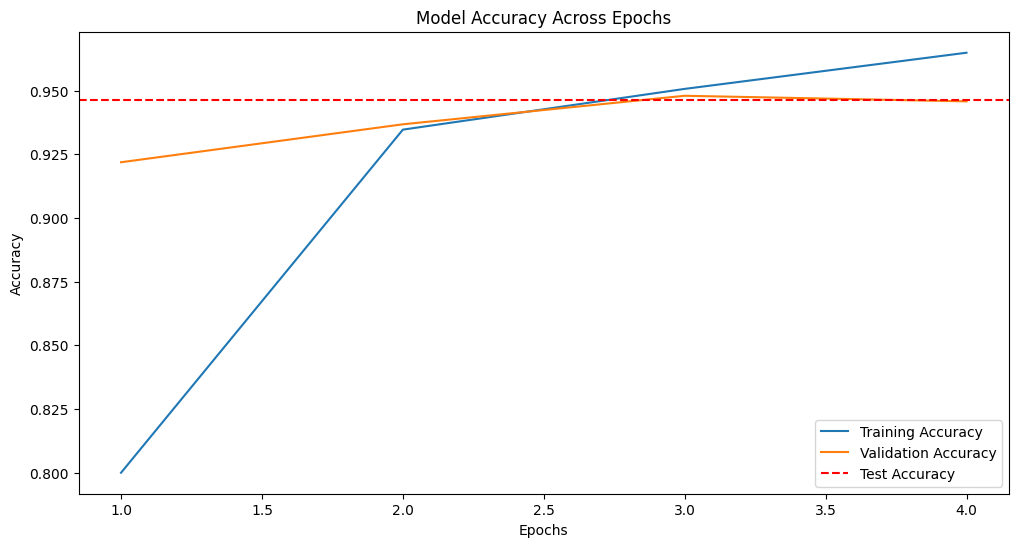

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


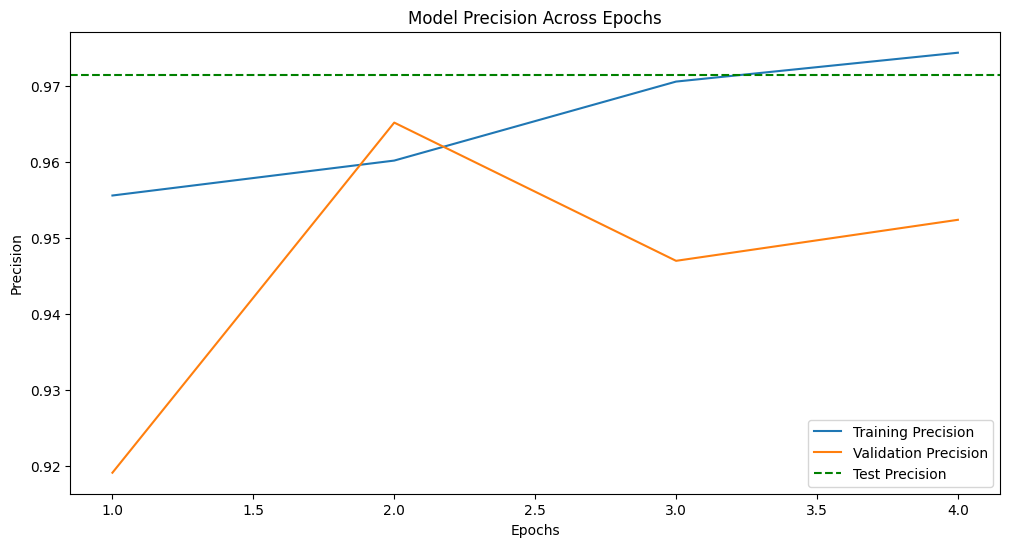

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


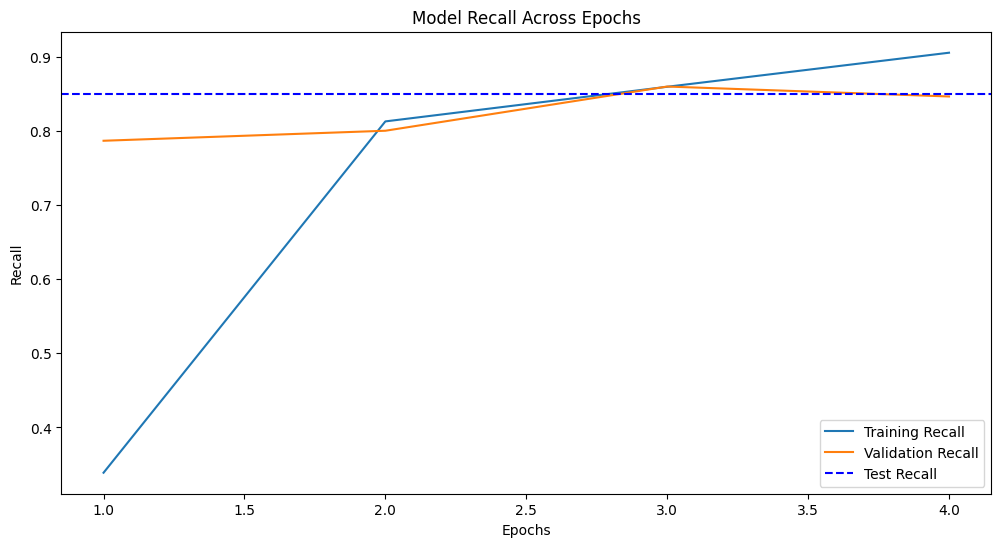

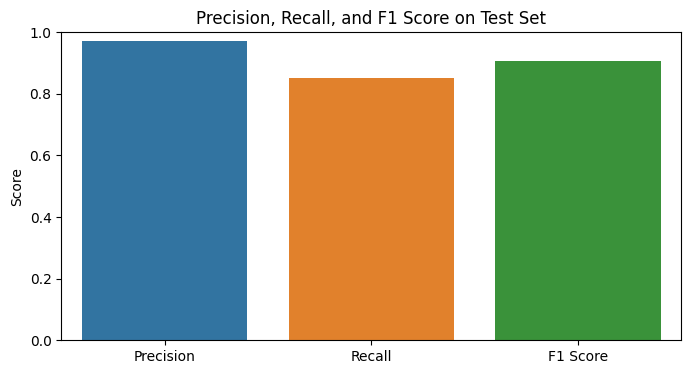

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Training and validation metrics for each epoch
epochs = [1, 2, 3, 4]
training_accuracy = [0.8000, 0.9347, 0.9507, 0.9649]
validation_accuracy = [0.9219, 0.9368, 0.9480, 0.9458]
training_precision = [0.9556, 0.9602, 0.9706, 0.9744]
validation_precision = [0.9191, 0.9652, 0.9470, 0.9524]
training_recall = [0.3389, 0.8126, 0.8593, 0.9052]
validation_recall = [0.7865, 0.8000, 0.8596, 0.8462]

# Test set results
test_accuracy = 0.9464513659477234
test_precision = 0.9714285731315613
test_recall = 0.8500000238418579
test_f1_score = 0.9066666809717813

# Plotting accuracy, precision, and recall across epochs
plt.figure(figsize=(12, 6))
sns.lineplot(epochs, training_accuracy, label='Training Accuracy')
sns.lineplot(epochs, validation_accuracy, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(epochs, training_precision, label='Training Precision')
sns.lineplot(epochs, validation_precision, label='Validation Precision')
plt.axhline(y=test_precision, color='g', linestyle='--', label='Test Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Model Precision Across Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(epochs, training_recall, label='Training Recall')
sns.lineplot(epochs, validation_recall, label='Validation Recall')
plt.axhline(y=test_recall, color='b', linestyle='--', label='Test Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Model Recall Across Epochs')
plt.legend()
plt.show()

# Plotting precision, recall, and F1 score on test set
plt.figure(figsize=(8, 4))
sns.barplot(x=['Precision', 'Recall', 'F1 Score'], y=[test_precision, test_recall, test_f1_score])
plt.title('Precision, Recall, and F1 Score on Test Set')
plt.ylabel('Score')
plt.ylim(0, 1)  # Adjust the y-axis limit
plt.show()
